# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Stepped Frequency Waveform
***

Referring to Section 8.2, the stepped frequency technique is an example of interpulse compression.  For stepped frequency waveforms, each successive pulse is transmitted at a different center frequency, as shown in Figure 8.2.  The frequency of the *i*th pulse is given by (Equation 8.3)

$$
    f_i = f_0 + (i - 1)\, \Delta f \hspace{0.5in} \text{(Hz)},
$$

where $f_0$ is the carrier frequency, and $\Delta f$ is the frequency step size between successive pulses. The instantaneous bandwidth of each transmitted pulse is approximately $1/\tau$ Hz.  However, the effective bandwidth is much larger, and is written as (Equation 8.4)

$$
    B_{effective} = N \Delta f \hspace{0.5in} \text{(Hz)},
$$

where $N$ is the number of pulses.  The spectrum of the stepped frequency waveform is illustrated in Figure 8.3.

The range resolution for the stepped frequency waveform is then (Equation 8.5)

$$
    \Delta r = \left( \frac{c}{2 N \Delta f} \right) \hspace{0.5in} \text{(m)}.
$$

The return signal is composed of the in-phase and quadrature components and may be expressed as $ s_i(t) = A_i(t)\, e^{j\phi_i(t)},$ where the phase is $\phi_i(t) = 2 \pi f_i \, t_i$ radians. 

The overall baseband return signal then becomes (Equation 8.6)

$$
    s_i(t) = A_i(t)\, \exp\left[ -j \frac{4\pi}{c}\left(f_0 + (i - 1) \Delta f\right) \left(r_0 + (i - 1)\, v\, T \right) \right].
$$
***

Set the number of steps, the frequency step (Hz), the pulse repetition frequency (Hz), the target range (m), the target velocity (m/s), and the target radar cross section (m^2)

In [1]:
number_of_steps = 64

frequency_step = 50e3

prf = 100

target_range = [500.0, 1500.0, 2000.0]

target_rcs = [1.0, 10.0, 100.0]

target_velocity = [0.0, 0.0, 10.0]

Set the window type (Kaiser, Blackman-Harris, Hanning, Hamming, or Rectangular)

In [2]:
window_type = 'Hanning'

Get the window coefficients using the routines from `scipy.signal.windows`

In [3]:
from scipy.signal.windows import hann, hamming, blackmanharris, kaiser 
    
    
if window_type == 'Kaiser':

    coefficients = kaiser(number_of_steps, 6, True)

elif window_type == 'Blackman-Harris':

    coefficients = blackmanharris(number_of_steps, True)

elif window_type == 'Hanning':

    coefficients = hann(number_of_steps, True)

elif window_type == 'Hamming':

    coefficients = hamming(number_of_steps, True)

elif window_type == 'Rectangular':

    coefficients = ones(number_of_steps)

Calculate the baseband return signal

In [4]:
from numpy import zeros, sqrt, exp, conj

from scipy.constants import pi, c


s = zeros(number_of_steps, dtype=complex)


for rng, rcs, v in zip(target_range, target_rcs, target_velocity):

    s += [sqrt(rcs) * exp(-1j * 4.0 * pi / c * (i * frequency_step) * (rng - v * (i / prf))) for i in range(number_of_steps)]

Get the length for the iFFT using `next_fast_len` from `fftpack` and perform the inverse Fourier transform

In [5]:
from scipy.fftpack import ifft, next_fast_len

n = next_fast_len(10 * number_of_steps)

sf = ifft(s * coefficients, n) * float(n) / float(number_of_steps)

Calculate the unambiguous range and set up the range window using the `linspace` routine from `scipy`

In [6]:
from numpy import linspace


# range_resolution = c / (2.0 * number_of_steps * frequency_step)

range_unambiguous = c / (2.0 * frequency_step)

range_window = linspace(0, range_unambiguous, n)

Display the results of the stepped frequency waveform using the `matplotlib` routines

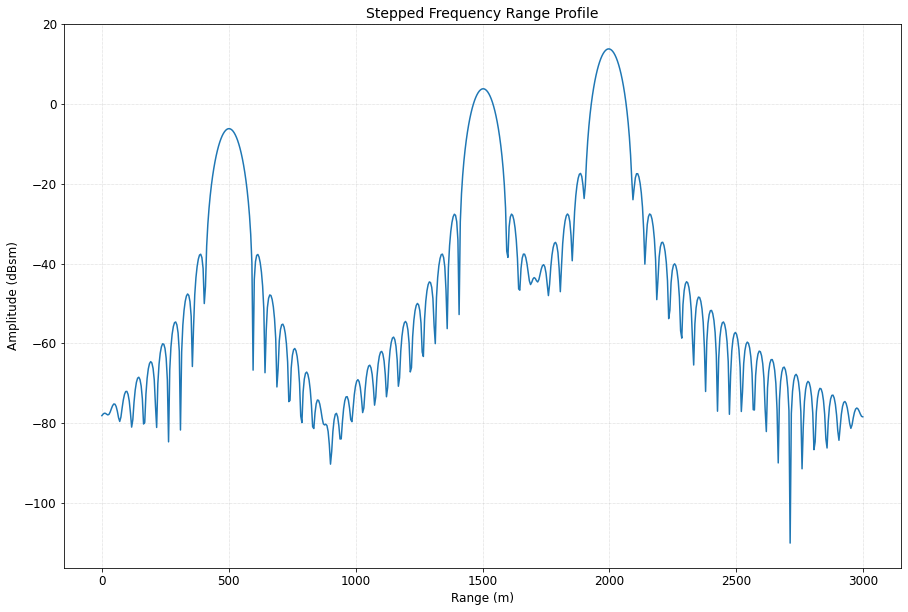

In [7]:
from matplotlib import pyplot as plt

from numpy import log10, finfo


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)



# Create the line plot

plt.plot(range_window, 20.0 * log10(abs(sf) + finfo(float).eps), '')



# Set the x and y axis labels

plt.xlabel("Range (m)", size=12)

plt.ylabel("Amplitude (dBsm)", size=12)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Set the plot title and labels

plt.title('Stepped Frequency Range Profile', size=14)



# Set the tick label size

plt.tick_params(labelsize=12)